In [43]:
# this code loads the labjack_stream.csv file and plots each of the columns

#!/usr/bin/env python3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# allow a matplot widget that we can interact with
%matplotlib widget

In [44]:
# load the labjack_stream.csv file
data_file = "captures/labjack_stream.csv"
df = pd.read_csv(data_file)
df

,sample_index,time_s,AIN0,AIN1,AIN2
0,0,0.00000,10.088452,0.010911,0.001448
1,1,0.00025,2.750069,1.986107,2.500567
2,2,0.00050,2.345062,1.987054,3.265159
3,3,0.00075,2.832711,1.986738,3.913675
4,4,0.00100,3.268629,1.986107,4.348647
...,...,...,...,...,...
120395,120395,30.09875,0.193858,0.010595,1.087459
120396,120396,30.09900,-0.274204,0.010911,0.653118
120397,120397,30.09925,-0.472901,0.009964,0.501398
120398,120398,30.09950,-0.373237,0.009649,0.652802


Number of rising edges on AIN1: 906


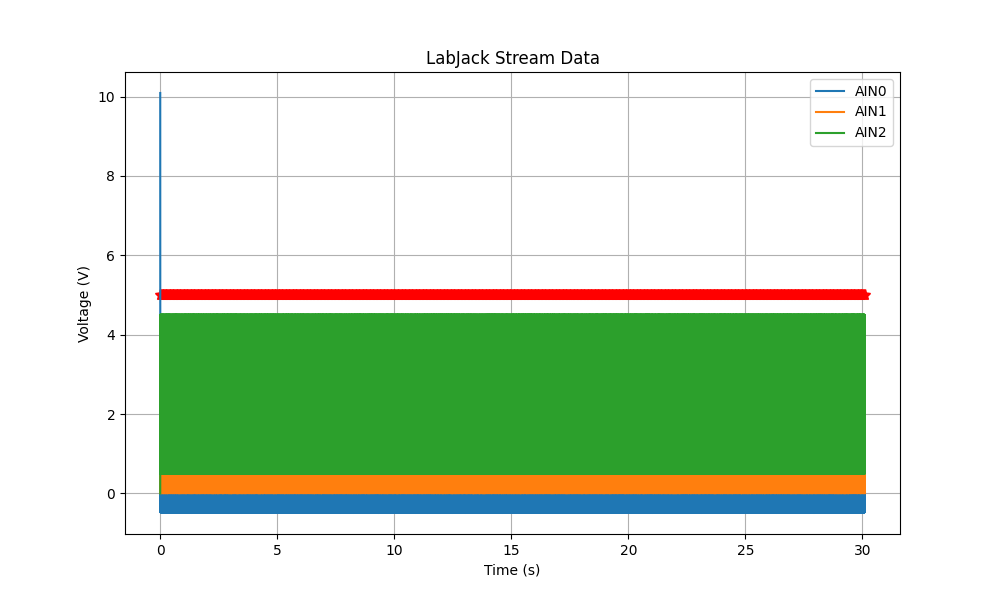

In [45]:
# plot time vs each channel: AIN0, AIN1, AIN2
# include in the figure a red star above each rising edge on AIN1
#calculate the rising edges on AIN1
ain1 = df['AIN1'].values
rising_edges = np.where(np.diff(ain1) > 1.5)[0] + 1  # +1 to correct the index shift caused by diff
rising_times = df['time_s'].values[rising_edges]
rising_heights = np.full(rising_times.shape, 5.0)

num_rising_edges = len(rising_edges)
print(f"Number of rising edges on AIN1: {num_rising_edges}")

plt.figure(figsize=(10, 6))
# plot red stars above each rising edge at 5V
plt.plot(rising_times, rising_heights, marker='*', color='r', linestyle='None', markersize=8)
plt.plot(df['time_s'], df['AIN0'], label='AIN0')
plt.plot(df['time_s'], df['AIN1'], label='AIN1')
plt.plot(df['time_s'], df['AIN2'], label='AIN2')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('LabJack Stream Data')
plt.legend()
plt.grid()
plt.show()

In [ ]:
tmp = np.cumsum(np.diff(ain2 > 2.5))


np.float64(0.03425)